# Sanity Check on Pupil Labs Data

In [1]:
import ProtobufTypes_pb2 
import pandas as pd
import sys
import json
import inspect
from google.protobuf.json_format import MessageToDict
from google.protobuf.json_format import MessageToJson
from pandas.io.json import json_normalize
import collections
import numpy as np

### Read Pupil Data from protobuf

In [2]:
protobuf_obj = ProtobufTypes_pb2.EyetrackingDataSet()
# print(et_data.SerializeToString())
with open('Pupil.etd', "rb") as f:
    protobuf_obj.ParseFromString(f.read())
dict_obj = MessageToDict(protobuf_obj)

In [3]:
#Flatten the dictionary for easy df conversion
def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        nk = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, nk, sep=sep).items())
        else:
            items.append((nk,v))
    return dict(items)

In [4]:
val_df = pd.concat([pd.DataFrame(flatten(samples), index=[idx]) 
            for idx, samples in enumerate(dict_obj['validationSamples'])],
            ignore_index=True)


/home/lonesome/venv3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
val_df.isna().mean()

combinedEyeAngleOffset_x    0.000000
combinedEyeAngleOffset_y    0.000000
combinedEyeAngleOffset_z    0.000000
headTransform_position_x    0.000000
headTransform_position_y    0.000000
headTransform_position_z    0.000000
headTransform_rotation_w    0.000000
headTransform_rotation_x    0.000000
headTransform_rotation_y    0.000000
headTransform_rotation_z    0.000000
headTransform_scale_x       0.000000
headTransform_scale_y       0.000000
headTransform_scale_z       0.000000
leftEyeAngleOffset_x        0.289858
leftEyeAngleOffset_y        0.289858
leftEyeAngleOffset_z        0.289858
pointToFocus_x              0.000000
pointToFocus_y              0.000000
pointToFocus_z              0.000000
rightEyeAngleOffset_x       0.893509
rightEyeAngleOffset_y       0.893509
rightEyeAngleOffset_z       0.893509
dtype: float64

Pupil labs returns upto 89% of data as mean only during the validation period.

In [6]:
val_df.columns

Index(['combinedEyeAngleOffset_x', 'combinedEyeAngleOffset_y',
       'combinedEyeAngleOffset_z', 'headTransform_position_x',
       'headTransform_position_y', 'headTransform_position_z',
       'headTransform_rotation_w', 'headTransform_rotation_x',
       'headTransform_rotation_y', 'headTransform_rotation_z',
       'headTransform_scale_x', 'headTransform_scale_y',
       'headTransform_scale_z', 'leftEyeAngleOffset_x', 'leftEyeAngleOffset_y',
       'leftEyeAngleOffset_z', 'pointToFocus_x', 'pointToFocus_y',
       'pointToFocus_z', 'rightEyeAngleOffset_x', 'rightEyeAngleOffset_y',
       'rightEyeAngleOffset_z'],
      dtype='object')

In [7]:
#change angles to be within 180 degrees
sel_columns = ['combinedEyeAngleOffset_x', 'combinedEyeAngleOffset_y','combinedEyeAngleOffset_z',
               'leftEyeAngleOffset_x', 'leftEyeAngleOffset_y','leftEyeAngleOffset_z',
               'rightEyeAngleOffset_x', 'rightEyeAngleOffset_y','rightEyeAngleOffset_z']

for col in sel_columns:
    val_df.loc[val_df[col]>180, col] = 360 - val_df[col] 

### Plot the Validation error distribution for Left, Right and Cyclopean eye

Text(0.5, 0, 'Angle in degrees')

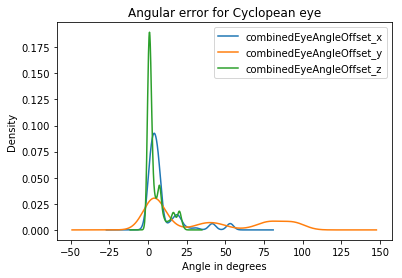

In [19]:
ax = val_df.loc[:,['combinedEyeAngleOffset_x','combinedEyeAngleOffset_y','combinedEyeAngleOffset_z']]\
    .plot.kde(title='Angular error for Cyclopean eye')
ax.set_xlabel('Angle in degrees')

Text(0.5, 0, 'Angle in degrees')

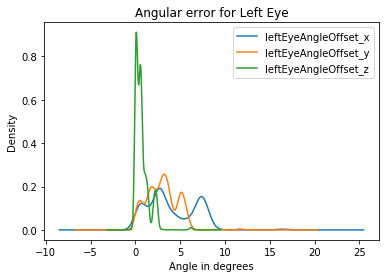

In [20]:
ax = val_df.loc[:,['leftEyeAngleOffset_x', 'leftEyeAngleOffset_y','leftEyeAngleOffset_z']]\
    .plot.kde(title='Angular error for Left Eye')
ax.set_xlabel('Angle in degrees')

Text(0.5, 0, 'Angle in degrees')

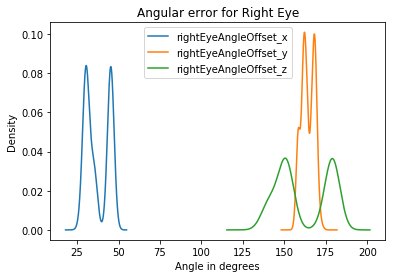

In [21]:
ax = val_df.loc[:,['rightEyeAngleOffset_x', 'rightEyeAngleOffset_y','rightEyeAngleOffset_z']]\
    .plot.kde(title='Angular error for Right Eye')
ax.set_xlabel('Angle in degrees')

In [24]:
dict_obj['trials']

[{'metaData': {'trialID': 5,
   'initialConfiguration': {'items': [{'shape': 'Cube',
      'position': {'x': 2.0, 'y': 1.0}},
     {'shape': 'Cylinder', 'position': {'x': 2.0, 'y': 2.0}},
     {'position': {'x': 2.0, 'y': 3.0}},
     {'shape': 'Tetraeder', 'position': {'x': 3.0, 'y': 2.0}},
     {'shape': 'Cube', 'color': 'Blue', 'position': {'x': 3.0, 'y': 4.0}},
     {'shape': 'Cylinder', 'color': 'Blue', 'position': {'x': 4.0, 'y': 4.0}},
     {'color': 'Blue', 'position': {'x': 3.0, 'y': 1.0}},
     {'shape': 'Tetraeder', 'color': 'Blue', 'position': {'x': 1.0, 'y': 2.0}},
     {'shape': 'Cube', 'color': 'Green', 'position': {}},
     {'shape': 'Cylinder', 'color': 'Green', 'position': {'y': 4.0}},
     {'color': 'Green', 'position': {'x': 4.0}},
     {'shape': 'Tetraeder',
      'color': 'Green',
      'position': {'x': 3.0, 'y': 3.0}},
     {'shape': 'Cube', 'color': 'Yellow', 'position': {'y': 3.0}},
     {'shape': 'Cylinder', 'color': 'Yellow', 'position': {'x': 3.0}},
     {'c